In [3]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
# Loading the data
df=pd.read_csv('covid19_dataset.csv')

In [5]:
#Checking the data
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.drop(columns='Province/State',inplace=True)

In [9]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
#Let's check take the sum of all confirmed,Recovered and death cases from all the country

w=df.groupby('Country/Region')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
w[w['Country/Region']=='India']

,Country/Region,Confirmed,Deaths,Recovered,Active
79,India,40883464,1111831,23783720,15987913


In [14]:
fig=px.choropleth(
    w,
    locations='Country/Region',
    locationmode='country names',
    color='Confirmed'
)
fig.show()

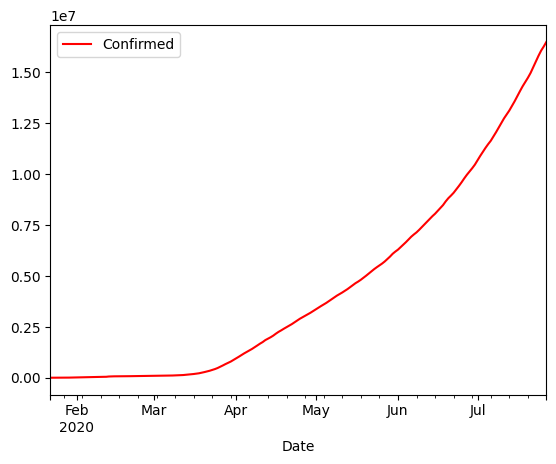

In [24]:
#Let's plot the graph for the confirmed cases with dates
confirmed_cases=df.groupby('Date')['Confirmed'].sum().reset_index()

confirmed_cases['Date']=pd.to_datetime(confirmed_cases['Date'])

confirmed_cases=confirmed_cases.set_index('Date')
confirmed_cases.plot(kind='line',color='red')

plt.show()

#Forcasting using Prophet

In [25]:
!pip install prophet

In [27]:
from prophet import Prophet

In [28]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [31]:
df.groupby('Date').sum()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
Date,,,,,,,,
2020-01-22,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,555,17,28,510,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-23,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,654,18,30,606,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-24,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,941,26,36,879,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-25,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,1434,42,39,1353,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-26,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,2118,56,52,2010,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
...,...,...,...,...,...,...,...,...
2020-07-23,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,15510481,633506,8710969,6166006,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-07-24,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,15791645,639650,8939705,6212290,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-07-25,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,16047190,644517,9158743,6243930,Eastern MediterraneanEuropeAfricaEuropeAfricaA...


In [33]:
total_active=df['Active'].sum()
total_active

396715350

In [63]:
confirmed=df.groupby('Date').sum()['Confirmed']
death=df.groupby('Date').sum()['Deaths']
recovered=df.groupby('Date').sum()['Recovered']

In [64]:
confirmed.head()

,Confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118


#Forcast the confirmed cases

In [65]:
confirmed.to_csv('confirmed.csv')

In [69]:
confirm=pd.read_csv('confirmed.csv',names=['ds','y'],usecols=[0,1])

In [74]:
confirm.head()

,ds,y
0,Date,Confirmed
1,2020-01-22,555
2,2020-01-23,654
3,2020-01-24,941
4,2020-01-25,1434


In [82]:
confirm.reset_index()

,index,ds,y
0,1,2020-01-22,555
1,2,2020-01-23,654
2,3,2020-01-24,941
3,4,2020-01-25,1434
4,5,2020-01-26,2118
...,...,...,...
183,184,2020-07-23,15510481
184,185,2020-07-24,15791645
185,186,2020-07-25,16047190
186,187,2020-07-26,16251796


In [83]:
confirm['ds']=pd.to_datetime(confirm['ds'])

In [84]:
model=Prophet()

In [86]:
model.fit(confirm)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3xhzc0_t/p8bfaacv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3xhzc0_t/n5maolxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96833', 'data', 'file=/tmp/tmp3xhzc0_t/p8bfaacv.json', 'init=/tmp/tmp3xhzc0_t/n5maolxy.json', 'output', 'file=/tmp/tmp3xhzc0_t/prophet_model27p3fo6g/prophet_model-20241015075346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [89]:
future=model.make_future_dataframe(periods=30)

In [90]:
forecast=model.predict(future)

In [93]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.239019e+05,8.785123e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.114422e+05,1.020681e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.038925e+05,1.077769e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.087557e+04,1.166481e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.505579e+04,1.061025e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.143681e+07,2.107824e+07,2.182042e+07,2.107961e+07,2.179405e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,2.145056e+07
214,2020-08-23,2.164080e+07,2.127313e+07,2.204537e+07,2.127005e+07,2.202744e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,2.164810e+07
215,2020-08-24,2.184479e+07,2.141844e+07,2.226307e+07,2.145584e+07,2.225525e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,2.184268e+07
216,2020-08-25,2.204878e+07,2.160562e+07,2.246753e+07,2.163426e+07,2.248623e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,2.203193e+07


In [91]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-01-22,-2.067684e+04
1,2020-01-23,-8.050948e+03
2,2020-01-24,5.827455e+03
3,2020-01-25,1.217668e+04
4,2020-01-26,8.405020e+03
...,...,...
213,2020-08-22,2.145056e+07
214,2020-08-23,2.164810e+07
215,2020-08-24,2.184268e+07
216,2020-08-25,2.203193e+07


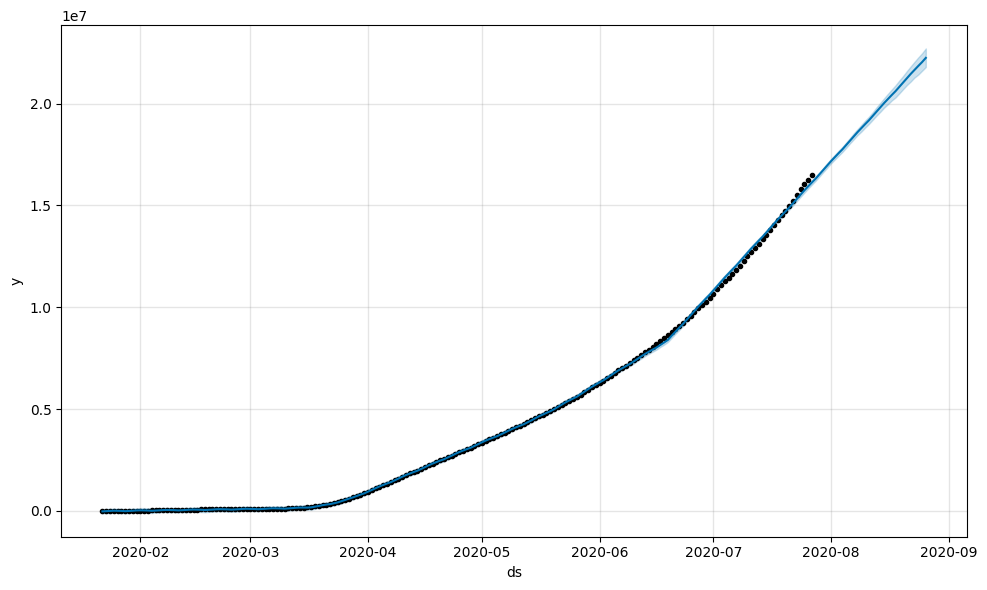

In [95]:
a=model.plot(forecast)

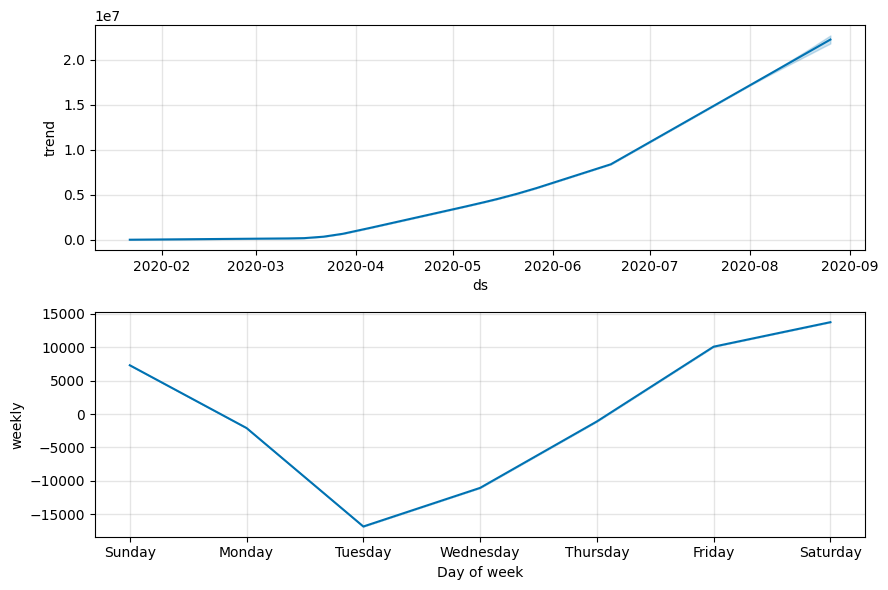

In [97]:
b=model.plot_components(forecast)